In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


# Save config information
#url = "http://api.openweathermap.org/data/2.5/weather?"
#city = "London"


# Build query URL
#query_url = url + "appid=" + weather_api_key + "&q=" + city

# Get weather data
#weather_response = requests.get(query_url)
#weather_json = weather_response.json()

# Get the temperature from the response
#print(f"The weather API responded with: {weather_json}.")

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

#for index, item in enumerate(cities):
    #print(f"{index + 1}. {item}")

      

Number of cities in the list: 603


In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}q={city}&appid={weather_api_key}&units=imperial" # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]# YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"]# YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"]# YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"]# YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"]# YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"] # YOUR CODE HERE
        city_country = city_weather["sys"]["country"]# YOUR CODE HERE
        city_date = city_weather["dt"]# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | sungailiat
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | vilyuchinsk
Processing Record 7 of Set 1 | ciudad cerralvo
City not found. Skipping...
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | timbuktu
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 12 of Set 1 | stanley
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | bodo
Processing Record 16 of Set 1 | bridgetown
Processing Record 17 of Set 1 | kingston
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | margaret river
Processing Record 20 of Set 1 | misrikh
Processing Record 21 of Se

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,44.69,83,100,1.01,US,1713521835
1,hermanus,-34.4187,19.2345,75.79,62,100,4.03,ZA,1713521957
2,olonkinbyen,70.9221,-8.7187,25.54,69,100,28.90,SJ,1713521958
3,sungailiat,-1.8500,106.1333,84.33,76,80,3.71,ID,1713521959
4,port alfred,-33.5906,26.8910,72.18,85,33,1.99,ZA,1713521959


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,44.69,83,100,1.01,US,1713521835
1,hermanus,-34.4187,19.2345,75.79,62,100,4.03,ZA,1713521957
2,olonkinbyen,70.9221,-8.7187,25.54,69,100,28.90,SJ,1713521958
3,sungailiat,-1.8500,106.1333,84.33,76,80,3.71,ID,1713521959
4,port alfred,-33.5906,26.8910,72.18,85,33,1.99,ZA,1713521959


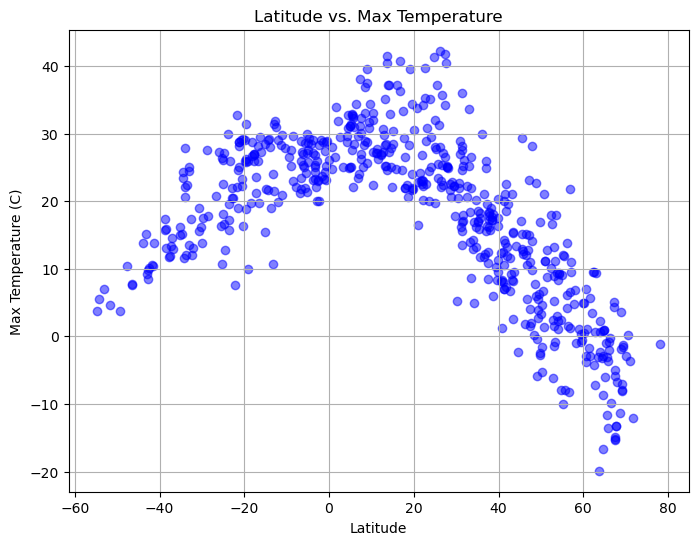

In [10]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
# Extract latitude and max temperature columns
latitude = city_data_df['Lat']
max_temp_fahrenheit = city_data_df['Max Temp']

# Convert Fahrenheit to Celsius
max_temp_celsius = (max_temp_fahrenheit - 32) * 5/9

# Incorporate the other graph properties
# YOUR CODE HERE
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(latitude, max_temp_celsius, color='blue', alpha=0.5)

# Set plot title and labels
plt.title('Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Show grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

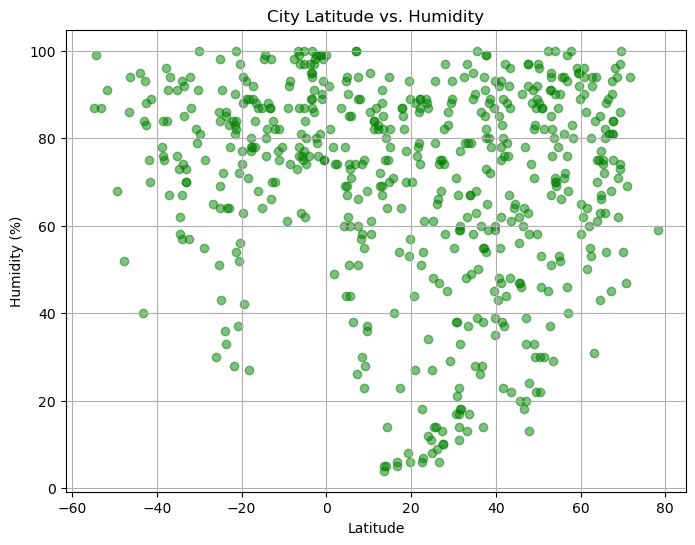

In [11]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
# Extract latitude and humidity columns
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']


# Incorporate the other graph properties
# YOUR CODE HERE
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(latitude, humidity, color='green', alpha=0.5)

# Set plot title and labels
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Show grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

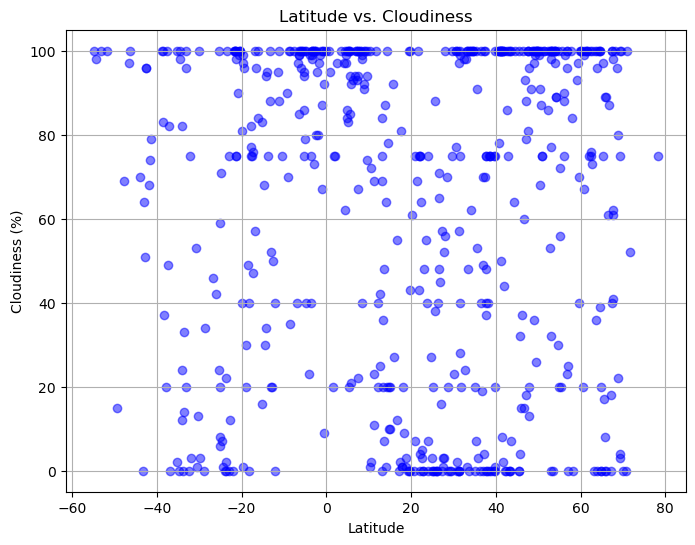

In [12]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
# Extract latitude and cloudiness columns
latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']

# Incorporate the other graph properties
# YOUR CODE HERE
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(latitude, cloudiness, color='blue', alpha=0.5)

# Set plot title and labels
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Show grid
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

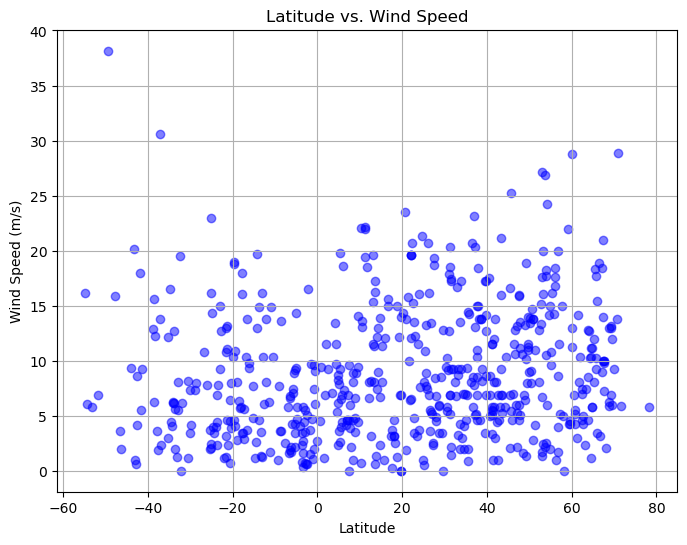

In [13]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
# Extract latitude and wind speed columns
latitude = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']

# Incorporate the other graph properties
# YOUR CODE HERE
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(latitude, wind_speed, color='blue', alpha=0.5)

# Set plot title and labels
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Show grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [14]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x, y):
    # Fit a linear regression line
    m, b = np.polyfit(x, y, 1)

    # Create the scatter plot
    plt.scatter(x, y, color='blue', alpha=0.5)

    # Plot the regression line
    plt.plot(x, m*x + b, color='red', linewidth=1)

    # Set plot title and labels
    plt.title(f'Linear Regression Plot: {x.name} vs. {y.name}')
    plt.xlabel(x.name)
    plt.ylabel(y.name)

    # Show plot
    plt.grid(False)
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
# Filter data for Northern Hemisphere (latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,44.69,83,100,1.01,US,1713521835
2,olonkinbyen,70.9221,-8.7187,25.54,69,100,28.90,SJ,1713521958
5,vilyuchinsk,52.9306,158.4028,36.25,94,98,1.32,RU,1713521960
6,longyearbyen,78.2186,15.6401,30.04,59,75,5.75,SJ,1713521963
7,timbuktu,16.7735,-3.0074,97.32,5,55,15.01,ML,1713521964


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
# Filter data for Southern Hemisphere (latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hermanus,-34.4187,19.2345,75.79,62,100,4.03,ZA,1713521957
3,sungailiat,-1.8500,106.1333,84.33,76,80,3.71,ID,1713521959
4,port alfred,-33.5906,26.8910,72.18,85,33,1.99,ZA,1713521959
8,grytviken,-54.2811,-36.5092,41.85,99,98,6.06,GS,1713521855
10,ushuaia,-54.8000,-68.3000,38.86,87,100,16.11,AR,1713521967


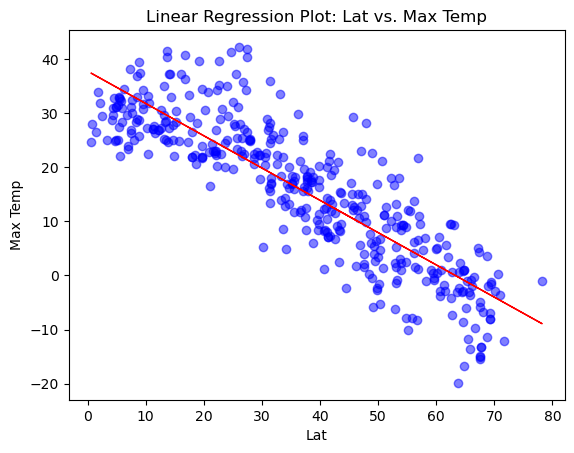

In [31]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
# Convert Fahrenheit to Celsius
max_temp_celsius = (northern_hemi_df['Max Temp'] - 32) * 5/9
plot_linear_regression(northern_hemi_df['Lat'], max_temp_celsius)

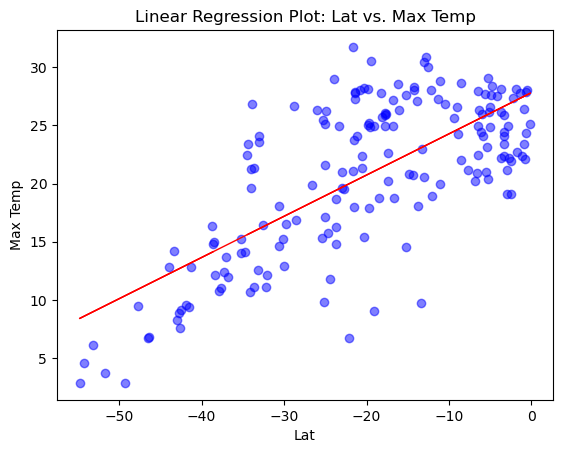

In [30]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
# Convert Fahrenheit to Celsius
max_temp_celsius = (southern_hemi_df['Max Temp'] - 33.71) * 5/9
plot_linear_regression(southern_hemi_df['Lat'], max_temp_celsius)

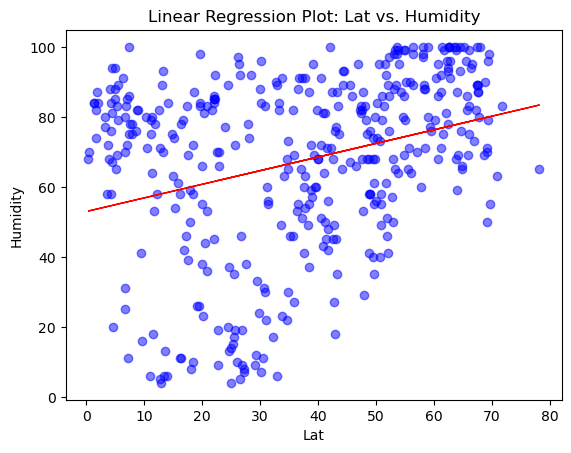

In [65]:
# Humidity vs. Latitude Linear Regression Plot
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

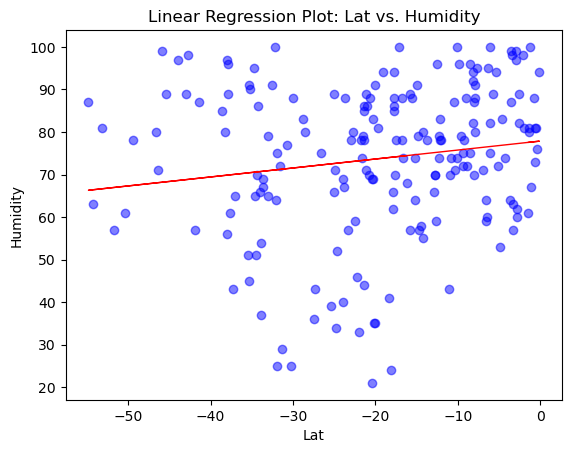

In [67]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

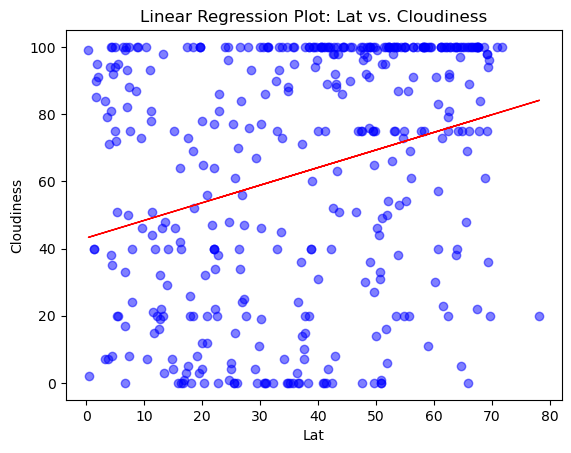

In [68]:
# Cloudiness vs. Latitude Linear Regression Plot
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

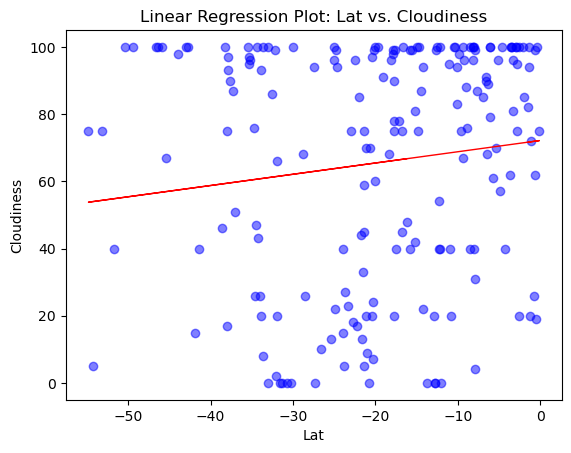

In [69]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

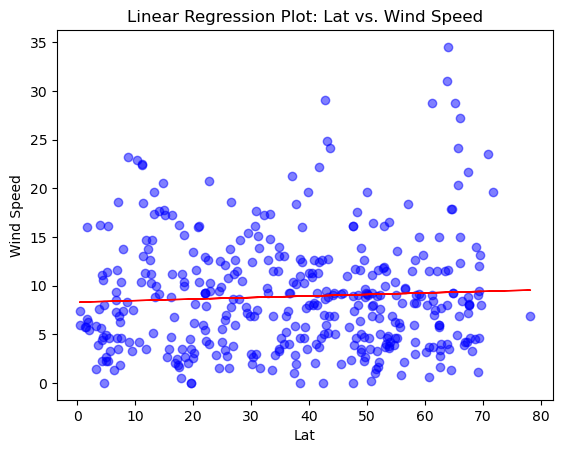

In [70]:
# Wind Speed vs. Latitude Linear Regression Plot
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

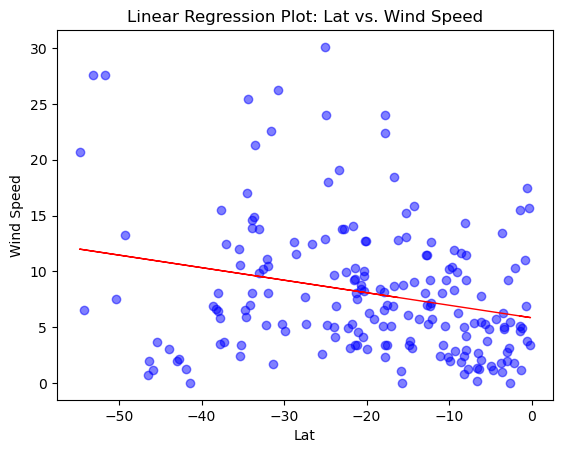

In [71]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])